# **Results**

### Basic setup:

In [230]:
# magics
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_credit import model_bufferstock
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of tools failed: Traceback (most recent call last):
  File "c:\Users\peter\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\peter\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "c:\Users\peter\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "c:\Users\peter\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "c:\Users\peter\OneDrive\Documents\GitHub\BufferStock\tools.py", line 88, in <module>
    def _interp_2d(grid1,grid2,value,xi1,xi2):
  File "c:\Users\peter\anaconda3\lib\site-packages\numba\core\decorators.py",

### 1. Run model for different values of $\lambda$:

In [294]:
model = model_bufferstock()

In [295]:
model.setup()

In [312]:
model.create_grids()

In [315]:
sol = model.solve()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(11,)


IndexError: invalid index to scalar variable.

In [311]:
import numpy as np

grid1 = np.array([1.0, 2.0, 3.0, 4.0], dtype=np.float64)
grid2 = np.array([0.1, 0.2, 0.3], dtype=np.float64)
value = np.array([[1.1, 1.2, 1.3],
                  [2.1, 2.2, 2.3],
                  [3.1, 3.2, 3.3],
                  [4.1, 4.2, 4.3]], dtype=np.float64)
xi1 = 2.5
xi2 = 0.15

# Call the interp_2d function
result = tools.interp_2d(grid1, grid2, value, xi1, xi2)

# Print the result
result

2.65

In [281]:
a = np.array([1,2,3])
b = np.array([4,5,6])

two_d = np.array([[1, 2, 3], [1,2,3], [3,4,5]])

a_plus = np.array([2,3,4])
b_plus = np.array([100, 200, 300])

In [282]:
import tools
tools.interp_2d(a, b, two_d, a_plus, b_plus)

TypeError: No matching definition for argument type(s) array(int32, 1d, C), array(int32, 1d, C), array(int32, 2d, C), array(int32, 1d, C), array(int32, 1d, C)

In [277]:
import numpy as np
from scipy.interpolate import griddata

# Define your input data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 4, 5])
z = np.array([5, 6, 9, 10, 8])

# Create a grid of points for interpolation
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


# Perform the 2D interpolation
zi = griddata((x, y), z, (xi, yi), method='linear')



2

In [174]:
tools.interp_2d(model.par.grid_w[10], model.par.grid_d[10], model.sol.v[10], model.par.grid_w[10], model.par.grid_d[10])

TypeError: No matching definition for argument type(s) array(float64, 1d, C), array(float64, 1d, C), array(float64, 2d, C), array(float64, 1d, C), array(float64, 1d, C)

In [170]:
model.par.grid_w[1,:]

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

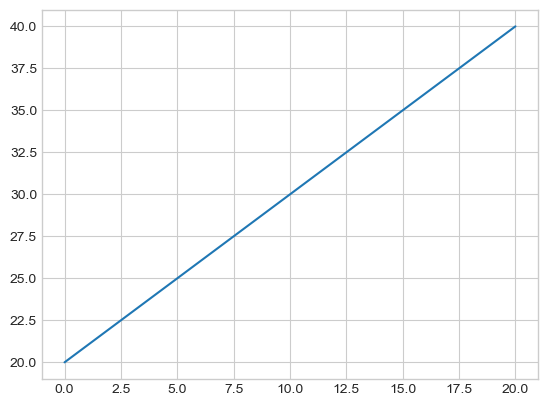

In [150]:
plt.plot(sol.grid_w[10,:],sol.c[10,:])

In [56]:
sol.c[60,:]

array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40.])

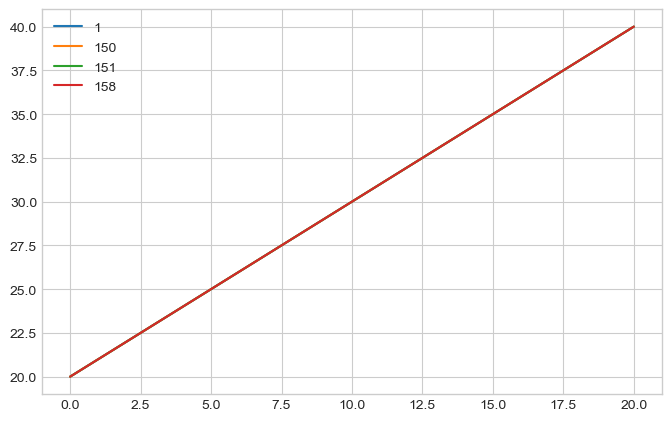

In [57]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
for age in [1, 150, 151, 158] :
    ax.plot(sol.grid_w[age,:],sol.c[age,:], label=age ,)

plt.legend()
plt.show()

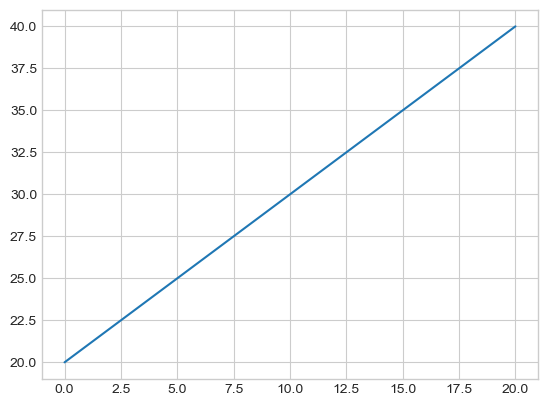

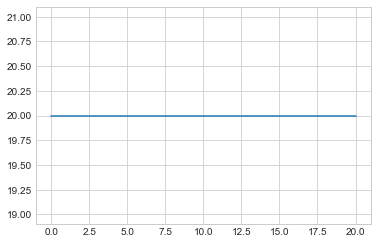

In [206]:
plt.plot(sol.grid_w[158,:],sol.d[158,:], label='Uniform distribution, $\epsilon$',)

Testing stuff

In [ ]:
import tools

sigma_xi = 0.1 # Transitory shock
sigma_psi = 0.1 # Permanent shock

# Discrete income shocks
low_p = 0.005 # Probability of very low shock (Called pi in slides)
low_val = 0.2 # Value of very small shock (Called mu in slides)

Neps = 8 # number of quadrature points for eps
Npsi = 8 # number of quadrature points for psi

eps,eps_w = tools.GaussHermite_lognorm(sigma_xi,Neps)

psi,psi_w = tools.GaussHermite_lognorm(sigma_psi,Npsi)

if low_p > 0:
    xi =  np.append(low_val+1e-8, (eps-low_p*low_val)/(1-low_p), axis=None) # +1e-8 makes it possible to take the log in simulation if low_val = 0
    xi_w = np.append(low_p, (1-low_p)*eps_w, axis=None)
    

else: # If no discrete shock then xi=eps
    par.xi = eps
    par.xi_w = eps_w




xi_vec = np.tile(xi,psi.size)       # Repeat entire array x times
psi_vec = np.repeat(psi,xi.size)    # Repeat each element of the array x times
xi_w_vec = np.tile(xi_w,psi.size)
psi_w_vec = np.repeat(psi_w,xi.size)

w = xi_w_vec * psi_w_vec
assert (1-sum(w) < 1e-8), 'the weights does not sum to 1'
Nshocks = w.size    # count number of shock nodes